# 事前知識とスパースモデリング

Copyright (C) 2024 Shogo MURAMATSU, All rights reserved

$𝑥_0$, $𝑥_1$は？

$$y = \begin{pmatrix} d_0 & d_1 \end{pmatrix}\begin{pmatrix}x_0\\x_1\end{pmatrix}$$

$x_1 = f(x_0) = (y - d_0x_0)/d_1= - (d_0/d_1)x_0 + y/d_1$



## 問題設定

-  $\displaystyle \mathbf{D}=\left(\begin{array}{cc} \frac{2}{3} & \frac{1}{3} \end{array}\right)\in {\mathbb{R}}^{1\times 2}$
-  $\displaystyle y=\frac{1}{2}\in {\mathbb{R}}^1$
-  $\displaystyle \mathbf{x}\in {\mathbb{R}}^2$


In [260]:
import numpy as np
import matplotlib.pyplot as plt

# 問題設定
d0, d1 = 2/3, 1/3
y = 1/2
D = np.array([d0,d1])
f = lambda x0: (y - d0*x0) / d1

# グリッドの作成
x = np.arange(-1, 1.1, 0.1)
X0, X1 = np.meshgrid(x, x)


## $\ell_2$-ノルム最小化問題

$$\hat{\mathbf{x}} =\arg \min_\mathbf{x} \|\mathbf{x}\|_2^2,\ \mathrm{s.t.}\ \mathbf{y}=\mathbf{Dx}$$

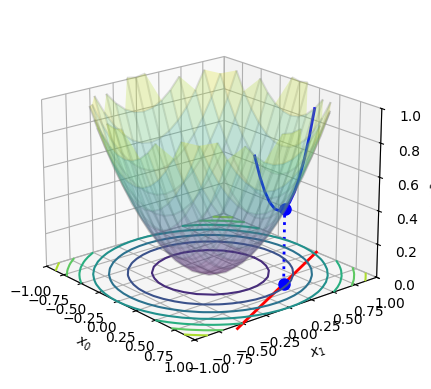

<Figure size 640x480 with 0 Axes>

In [261]:
# figure 1
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

# 評価関数
Y = X0**2+X1**2

# 範囲外の値をnanにする
valid_idx_z = (Y >= ax.get_zlim()[0]) & (Y <= ax.get_zlim()[1])
Y_clipped = Y.copy()
Y_clipped[~valid_idx_z] = np.nan

# 描画
ax.plot_wireframe(X0, X1, Y_clipped, color='gray', alpha=0.25)
ax.plot_surface(X0, X1, Y_clipped, cmap='viridis', alpha=0.25)
ax.contour(X0, X1, Y, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$\|\mathbf{x}\|_2^2$')
#ax.set_linewidth(1)

# 解空間
x0 = np.arange(-1, 1.1, 0.05)
x1 = f(x0)
valid_idx = (x1 >= ax.get_ylim()[0]) & (x1 <= ax.get_ylim()[1])
x0 = x0[valid_idx]
x1 = x1[valid_idx]
ax.plot(x0, x1, 0, color='red', linewidth=2)

# 解空間上での評価
s = x0**2+x1**2

# 範囲外の値をnanにする
valid_idx_z = (s >= ax.get_zlim()[0]) & (s <= ax.get_zlim()[1])
s_clipped = s.copy()
s_clipped[~valid_idx_z] = np.nan

# 描画
ax.plot(x0, x1, s_clipped, color='blue', linewidth=2)
ax.view_init(elev=ax.elev-10, azim=ax.azim+20)
mnz, mnidx = np.min(s), np.argmin(s)
mn0 = x0[mnidx]
mn1 = x1[mnidx]
hmrk = ax.plot([mn0, mn0], [mn1, mn1], [0, mnz], color='blue', linestyle=':', linewidth=2)
hmrk[0].set_marker('o')
hmrk[0].set_markersize(8)
hmrk[0].set_markeredgecolor('blue')
hmrk[0].set_markerfacecolor('blue')

plt.show()
plt.savefig('contour2.png')


## $\ell_1$-ノルム最小化問題

$$\hat{\mathbf{x}} =\arg \min_\mathbf{x} \|\mathbf{x}\|_1,\ \mathrm{s.t.}\ \mathbf{y}=\mathbf{Dx}$$

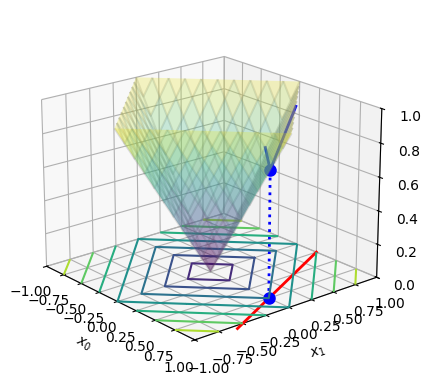

<Figure size 640x480 with 0 Axes>

In [262]:
# figure 2
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

# 評価関数
Y = np.abs(X0) + np.abs(X1)

# 範囲外の値をnanにする
valid_idx_z = (Y >= ax.get_zlim()[0]) & (Y <= ax.get_zlim()[1])
Y_clipped = Y.copy()
Y_clipped[~valid_idx_z] = np.nan
ax.plot_wireframe(X0, X1, Y_clipped, color='gray', alpha=0.25)
ax.plot_surface(X0, X1, Y_clipped, cmap='viridis', alpha=0.25)
ax.contour(X0, X1, Y, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$\|\mathbf{x}\|_1$')
#ax.set_linewidth(1)

# 解空間
x0 = np.arange(-1, 1.1, 0.05)
x1 = f(x0)
valid_idx = (x1 >= ax.get_ylim()[0]) & (x1 <= ax.get_ylim()[1])
x0 = x0[valid_idx]
x1 = x1[valid_idx]
ax.plot(x0, x1, 0, color='red', linewidth=2)

# 解空間上での評価
s = np.abs(x0)+np.abs(x1)

# 範囲外の値をnanにする
valid_idx_z = (s >= ax.get_zlim()[0]) & (s <= ax.get_zlim()[1])
s_clipped = s.copy()
s_clipped[~valid_idx_z] = np.nan

# 描画
ax.plot(x0, x1, s_clipped, color='blue', linewidth=2)
ax.view_init(elev=ax.elev-10, azim=ax.azim+20)
mnz, mnidx = np.min(s), np.argmin(s)
mn0 = x0[mnidx]
mn1 = x1[mnidx]
hmrk = ax.plot([mn0, mn0], [mn1, mn1], [0, mnz], color='blue', linestyle=':', linewidth=2)
hmrk[0].set_marker('o')
hmrk[0].set_markersize(8)
hmrk[0].set_markeredgecolor('blue')
hmrk[0].set_markerfacecolor('blue')

plt.show()
plt.savefig('contour1.png')


## $\ell_2$-ノルム正則化（Rigde回帰）


$$\hat{\mathbf{x}} =\arg \min_\mathbf{x} \frac{1}{2}\|v-\mathbf{Dx}{\|}_2^2 +\frac{\lambda }{2}\|\mathbf{x}\|_2^2$$

-  $\displaystyle v=\frac{1}{2}\in {\mathbb{R}}^1$
-  $\displaystyle \mathbf{x}\in {\mathbb{R}}^2$
-  $\displaystyle \lambda \in [0,\infty )$


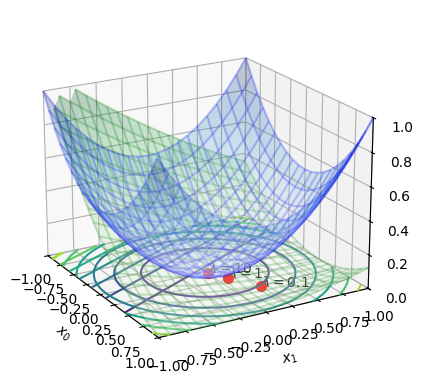

<Figure size 640x480 with 0 Axes>

In [263]:
# 観測値
v = 1/2

# パラメータ設定
lambda_ = 0.1
gamma_ = 1.0

# figure 3
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')

# 評価関数
f1 = lambda x0, x1: 0.5*(v-(d0*x0+d1*x1))**2
f2 = lambda x0, x1: 0.5*(x0**2+x1**2)

# 評価関数
Y1 = f1(X0,X1)
Y2 = f2(X0,X1)

# 範囲外の値をnanにする
valid_idx_z1 = (Y1 >= ax.get_zlim()[0]) & (Y1 <= ax.get_zlim()[1])
Y1_clipped = Y1.copy()
Y1_clipped[~valid_idx_z1] = np.nan
valid_idx_z2 = (Y2 >= ax.get_zlim()[0]) & (Y2 <= ax.get_zlim()[1])
Y2_clipped = Y2.copy()
Y2_clipped[~valid_idx_z2] = np.nan

# 描画
ax.plot_wireframe(X0, X1, Y1_clipped, color='green', alpha=0.25)
ax.plot_surface(X0, X1, Y1_clipped, cmap='Greens', alpha=0.25)
ax.contour(X0, X1, Y1, zdir='z', offset=0)
ax.plot_wireframe(X0, X1, Y2_clipped, color='blue', alpha=0.25)
ax.plot_surface(X0, X1, Y2_clipped, cmap='Blues', alpha=0.25)
ax.contour(X0, X1, Y2, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
#ax.set_zlabel(r'$\|\mathbf{x}\|_2^2$')
#ax.set_linewidth(1)

# 最小解の描画
for lmd_ in (0.1, 1, 10):
    A = np.array([[d0**2, d0*d1], [d0*d1, d1**2]]) + lmd_*np.eye(2)
    x = np.linalg.solve(A, D*v)
    ax.scatter(x[0], x[1], 0, color='red', s=50, marker='o')
    ax.text(x[0], x[1], 0,  r'$\lambda={:g}$'.format(lmd_))
ax.view_init(elev=ax.elev-10, azim=ax.azim+30)

plt.show()
plt.savefig('ridgeopt.png')

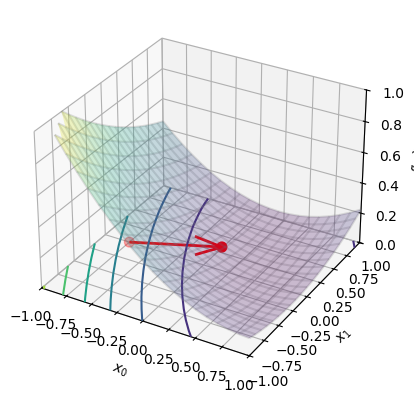

<Figure size 640x480 with 0 Axes>

In [264]:
# figure 4
fig4 = plt.figure()
ax = fig4.add_subplot(111, projection='3d')

# 評価関数
f = lambda x0, x1: 0.5*(v-(d0*x0+d1*x1))**2 + lambda_*0.5*(x0**2+x1**2)

# 範囲外の値をnanにする
F = f(X0, X1)
valid_idx_z = (F >= ax.get_zlim()[0]) & (F <= ax.get_zlim()[1])
F_clipped = F.copy()
F_clipped[~valid_idx_z] = np.nan

# 描画
ax.plot_wireframe(X0, X1, F_clipped, color='gray', alpha=0.25)
ax.plot_surface(X0, X1, F_clipped, cmap='viridis', alpha=0.25)
ax.contour(X0, X1, F, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$f(\mathbf{x})$')
#ax.set_linewidth(1)

# 勾配降下（１ステップ）
x = []
s = np.array([-0.75, 0])
x.append(s)
t = s - gamma_*(D.T.dot(D.dot(s)-v)+lambda_*s)
x.append(t)
#
x = np.array(x)
ax.quiver(x[0,0], x[0,1], 0, x[1,0]-x[0,0], x[1,1]-x[0,1], 0, color='red', linewidth=2)
ax.scatter(x[:,0], x[:,1], 0, color='red', s=50, marker='o')

plt.show()
plt.savefig('contour3.png')


逐次最適化

$$\mathbf{x}^{(i)} = \mathbf{x}^{(i-1)} - \gamma \nabla f(\mathbf{x}^{(i-1)})$$

- $\nabla f(\mathbf{x})=\mathbf{D}^{\intercal}(\mathbf{Dx}-v)+\lambda \mathbf{x}$


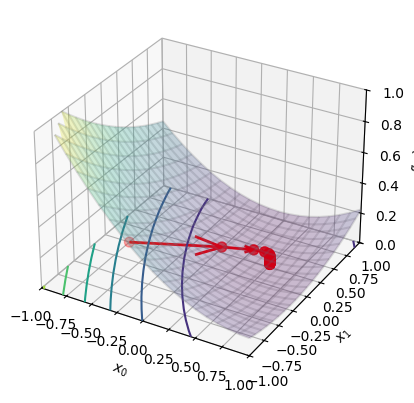

<Figure size 640x480 with 0 Axes>

In [265]:
# figure 5
fig5 = plt.figure()
ax = fig5.add_subplot(111, projection='3d')

# 描画
ax.plot_wireframe(X0, X1, F_clipped, color='gray', alpha=0.25)
ax.plot_surface(X0, X1, F_clipped, cmap='viridis', alpha=0.25)
ax.contour(X0, X1, F, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$f(\mathbf{x})$')
#ax.set_linewidth(1)

# 勾配降下（20ステップ）
x = []
s = np.array([-0.75, 0])
for idx in range(20):
    x.append(s)
    t = s - gamma_*(D.T.dot(D.dot(s)-v)+lambda_*s)
    x.append(t)
    s = t
#
x = np.array(x)
ax.quiver(x[0:-2,0], x[0:-2,1], 0, x[1:-1,0]-x[0:-2,0], x[1:-1,1]-x[0:-2,1], 0, color='red', linewidth=2)
ax.scatter(x[:,0], x[:,1], 0, color='red', s=50, marker='o')

plt.show()
plt.savefig('exgrad.png')


## $\ell_1$-ノルム正則化（Lasso回帰）


$$\hat{\mathbf{x}} =\arg \min_\mathbf{x} \frac{1}{2}\|v-\mathbf{Dx}{\|}_2^2 +\lambda \|\mathbf{x}\|_1$$

-  $\displaystyle v=\frac{1}{2}\in {\mathbb{R}}^1$
-  $\displaystyle \mathbf{x}\in {\mathbb{R}}^2$
-  $\displaystyle \lambda \in [0,\infty )$

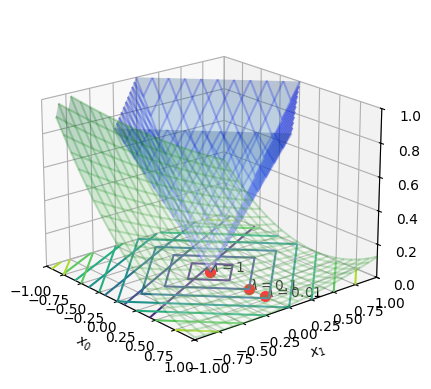

<Figure size 640x480 with 0 Axes>

In [266]:
# figure 6
fig6 = plt.figure()
ax = fig6.add_subplot(111, projection='3d')

# 評価関数
f1 = lambda x0, x1: 0.5*(v-(d0*x0+d1*x1))**2
f2 = lambda x0, x1: np.abs(x0)+np.abs(x1)

# 評価関数
Y1 = f1(X0,X1)
Y2 = f2(X0,X1)

# 範囲外の値をnanにする
valid_idx_z1 = (Y1 >= ax.get_zlim()[0]) & (Y1 <= ax.get_zlim()[1])
Y1_clipped = Y1.copy()
Y1_clipped[~valid_idx_z1] = np.nan
valid_idx_z2 = (Y2 >= ax.get_zlim()[0]) & (Y2 <= ax.get_zlim()[1])
Y2_clipped = Y2.copy()
Y2_clipped[~valid_idx_z2] = np.nan

# 描画
ax.plot_wireframe(X0, X1, Y1_clipped, color='green', alpha=0.25)
ax.plot_surface(X0, X1, Y1_clipped, cmap='Greens', alpha=0.25)
ax.contour(X0, X1, Y1, zdir='z', offset=0)
ax.plot_wireframe(X0, X1, Y2_clipped, color='blue', alpha=0.25)
ax.plot_surface(X0, X1, Y2_clipped, cmap='Blues', alpha=0.25)
ax.contour(X0, X1, Y2, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

# 最小解の描画
for lmd_ in (0.01, 0.1, 1):
    J = Y1 + lmd_*Y2
    mnidx = np.unravel_index(np.argmin(J, axis=None), J.shape)
    x = X0[mnidx], X1[mnidx]
    ax.scatter(x[0], x[1], 0, color='red', s=50, marker='o')
    ax.text(x[0], x[1], 0,  r'$\lambda={:g}$'.format(lmd_))
ax.view_init(elev=ax.elev-10, azim=ax.azim+20)

plt.show()
plt.savefig('lassoopt.png')

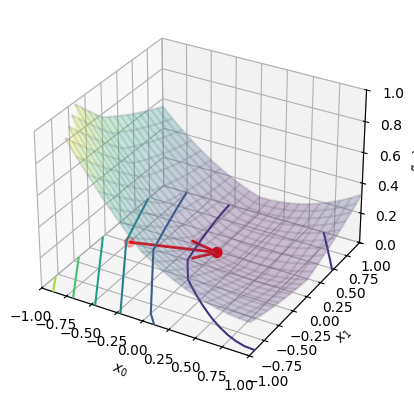

<Figure size 640x480 with 0 Axes>

In [267]:
# figure 7
fig7 = plt.figure()
ax = fig7.add_subplot(111, projection='3d')

#　評価関数
f = lambda x0, x1: 0.5*(v-(d0*x0+d1*x1))**2 + lambda_*(np.abs(x0)+np.abs(x1))

# 範囲外の値をnanにする
F = f(X0, X1)
valid_idx_z = (F >= ax.get_zlim()[0]) & (F <= ax.get_zlim()[1])
F_clipped = F.copy()
F_clipped[~valid_idx_z] = np.nan
ax.plot_wireframe(X0, X1, F_clipped, color='gray', alpha=0.25)
ax.plot_surface(X0, X1, F_clipped, cmap='viridis', alpha=0.25)
ax.contour(X0, X1, F, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$f(\mathbf{x})$')
#ax.set_linewidth(1)

# ソフト閾値関数
soft_threshold = lambda x, th: np.sign(x) * np.maximum(np.abs(x) - th, 0)

# 近接勾配降下（１ステップ）
x = []
s = np.array([-0.75, 0])
x.append(s)
t = soft_threshold(s - gamma_*(D.T.dot(D.dot(s)-v)),gamma_*lambda_)
x.append(t)
#
x = np.array(x)
ax.quiver(x[0,0], x[0,1], 0, x[1,0]-x[0,0], x[1,1]-x[0,1], 0, color='red', linewidth=2)
ax.scatter(x[:,0], x[:,1], 0, color='red', s=50, marker='o')

plt.show()
plt.savefig('contour4.png')



逐次最適化

$$\mathbf{x}^{(i)} = \mathcal{T}_{\gamma\lambda}\left(\mathbf{x}^{(i-1)} - \gamma \nabla f_1(\mathbf{x}^{(i-1)})\right)$$

- $\nabla f_1(\mathbf{x})=\mathbf{D}^{\intercal}(\mathbf{Dx}-v)$
- $[\mathcal{T}_{\lambda}(\mathbf{x})]_k = \left\{ \begin{array}{ll} x_k +\lambda & x_k\leq -\lambda \\ 0 & |x_k|<\lambda \\ x_k -\lambda & x_k\geq -\lambda  \end{array}\right.$


True

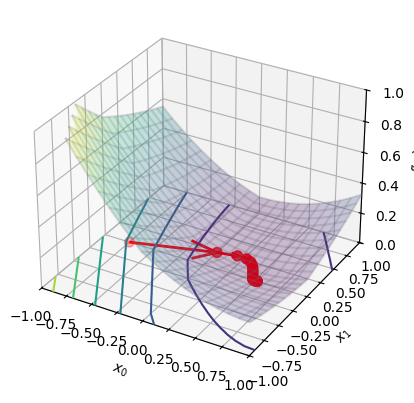

<Figure size 640x480 with 0 Axes>

In [268]:
# figure 8
fig8 = plt.figure()
ax = fig8.add_subplot(111, projection='3d')

# 収束条件
beta_ = D.dot(D.T)
display(gamma_ < 2/beta_)

# 描画
ax.plot_wireframe(X0, X1, F_clipped, color='gray', alpha=0.25)
ax.plot_surface(X0, X1, F_clipped, cmap='viridis', alpha=0.25)
ax.contour(X0, X1, F, zdir='z', offset=0)
ax.set_zlim([0, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
#ax.invert_xaxis()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$f(\mathbf{x})$')
#ax.set_linewidth(1)

# 近接勾配降下（20ステップ）
x = []
s = np.array([-0.75, 0])
for idx in range(20):
    x.append(s)
    t = soft_threshold(s - gamma_*(D.T.dot(D.dot(s)-v)),gamma_*lambda_)
    x.append(t)
    s = t
#
x = np.array(x)
ax.quiver(x[0:-2,0], x[0:-2,1], 0, x[1:-1,0]-x[0:-2,0], x[1:-1,1]-x[0:-2,1], 0, color='red', linewidth=2)
ax.scatter(x[:,0], x[:,1], 0, color='red', s=50, marker='o')

plt.show()
plt.savefig('exprox.png')

